In [2]:
import pandas as pd
import numpy as np

In [3]:
birthes = pd.read_html("https://uk.wikipedia.org/wiki/%D0%9D%D0%B0%D1%81%D0%B5%D0%BB%D0%B5%D0%BD%D0%BD%D1%8F_%D0%A3%D0%BA%D1%80%D0%B0%D1%97%D0%BD%D0%B8#%D0%9D%D0%B0%D1%80%D0%BE%D0%B4%D0%B6%D1%83%D0%B2%D0%B0%D0%BD%D1%96%D1%81%D1%82%D1%8C", thousands='.', decimal=',')[10]

In [16]:
birthes.head()

,Регіон,1950,1960,1970,1990,2000,2012,2014,2019
0,Крим,23.0,20.6,16.0,13.0,7.3,12.6,11.144,8.017391
1,Вінницька,22.4,19.2,14.2,12.4,8.4,11.2,10.900,7.600000
2,Волинська,24.7,25.0,17.9,15.3,11.2,14.8,14.100,10.100000
3,Дніпропетровська,20.4,20.4,15.1,12.3,7.1,11.2,11.100,7.100000
4,Донецька,27.1,21.4,14.0,10.9,6.1,9.8,8.200,8.017391


In [5]:
birthes.dtypes

Регіон     object
1950      float64
1960      float64
1970      float64
1990      float64
2000      float64
2012      float64
2014       object
2019       object
dtype: object

In [6]:
birthes.shape

(28, 9)

In [7]:
birthes.replace("—", np.nan, inplace=True)
birthes[["2014", "2019"]] = birthes[["2014", "2019"]].apply(pd.to_numeric)
birthes = birthes[:-1]

In [8]:
birthes.isnull().sum()

Регіон    0
1950      2
1960      1
1970      1
1990      0
2000      0
2012      0
2014      2
2019      4
dtype: int64

In [11]:
birthes.fillna({
    "1950": birthes["1950"].mean(), 
    "1960": birthes["1960"].mean(),
    "1970": birthes["1970"].mean(),
    "2014": birthes["2014"].mean(),
    "2019": birthes["2019"].mean(),
}, inplace=True)

In [18]:
birthes[birthes["2019"] > birthes["2019"].mean()]["Регіон"]

2             Волинська
6          Закарпатська
8     Івано-Франківська
12            Львівська
14              Одеська
16           Рівненська
20           Херсонська
23          Чернівецька
25                 Київ
Name: Регіон, dtype: object

In [20]:
birthes[birthes["2014"] == birthes["2014"].max()]["Регіон"]

16    Рівненська
Name: Регіон, dtype: object

<AxesSubplot:>

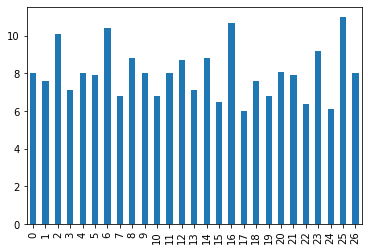

In [29]:
birthes["2019"].plot(kind="bar")